<a href="https://colab.research.google.com/github/natcruuz/Modelos-de-Regresi-n-Lineal/blob/main/Actividad5_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv
from google.colab import files
files.upload()

In [ ]:
#Cargar desde un archivo csv
data = pd.read_csv("cuentas_credicel.csv", encoding= 'latin')
data.head(2)

<ipython-input-3-812a520e40ed>:2: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cuentas_credicel.csv", encoding= 'latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN


In [ ]:
# Limitar el número máximo de columnas
pd.options.display.max_columns = None

In [ ]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Elegimos las columnas que nos interesan
tab = data.iloc[:, [8,7,12, 20, 26,6,11,27]]
tab.head(2)

,enganche,precio,costo_total,pagos_realizados,riesgo,plazo,monto_financiado,porc_enganche
0,780.0,1949.0,2106,0,NaN,26S,1169.0,NaN
1,1050.0,2999.0,2925,0,NaN,13S,1949.0,NaN


In [ ]:
#Veamos el tipo de datos que tenemos
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enganche          22735 non-null  float64
 1   precio            22735 non-null  float64
 2   costo_total       22735 non-null  int64  
 3   pagos_realizados  22735 non-null  int64  
 4   riesgo            20262 non-null  object 
 5   plazo             22735 non-null  object 
 6   monto_financiado  22735 non-null  float64
 7   porc_enganche     20262 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
#Comprobamos valores nulos
valores_nulos = tab.isnull().sum()
valores_nulos

enganche               0
precio                 0
costo_total            0
pagos_realizados       0
riesgo              2473
plazo                  0
monto_financiado       0
porc_enganche       2473
dtype: int64

**Convertimos la columna plazo a entero quitando el caracter "S"**

In [ ]:
#Eliminar un signo de una columna
tab['plazo']=tab['plazo'].str.replace('S', '')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
tab["plazo"]= tab["plazo"].astype(int)

In [ ]:
#Verificamos que se haya convertido
tab.info()

**Convertir columna riesgo a entero, quitando los carácteres existentes**

In [ ]:
#Se sustituyen los valores nulos por cero
#Sustituyo valores nulos por el numero "0"
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
tab["riesgo"]= tab["riesgo"].fillna(0)

In [ ]:
#Analizar categorias de una columna
riesgo_categorias = tab.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

In [ ]:
#Sustituyo los strings Atraso, Cancelado y Fraude por la constante "0"
tab['riesgo']=tab['riesgo'].str.replace('Atraso', '0')
tab['riesgo']=tab['riesgo'].str.replace('Cancelado', '0')
tab['riesgo']=tab['riesgo'].str.replace('Fraude', '0')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
tab['riesgo']= tab['riesgo'].astype(float)

In [ ]:
#Corroboramos la información
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enganche          22735 non-null  float64
 1   precio            22735 non-null  float64
 2   costo_total       22735 non-null  int64  
 3   pagos_realizados  22735 non-null  int64  
 4   riesgo            13911 non-null  float64
 5   plazo             22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   porc_enganche     20262 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


**Sustituimos los outliers del data frame**



<Figure size 1500x800 with 0 Axes>

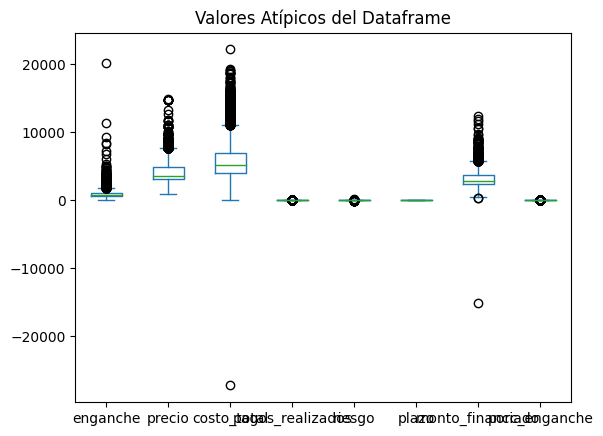

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
tab.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=tab
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
tab_sin_outliers = tab[(y<=Limite_Superior)&(y>=Limite_Inferior)]

In [ ]:
#Corroboramos valores nulos
valores_nulos=tab_sin_outliers.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cl = tab_sin_outliers.copy()
data_cl=data_cl.fillna(round(tab_sin_outliers.mean(),1))

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_cl.isnull().sum()
valores_nulos

enganche            0
precio              0
costo_total         0
pagos_realizados    0
riesgo              0
plazo               0
monto_financiado    0
porc_enganche       0
dtype: int64

**Modelos de regreisón Lineal Simple**


**Primera variable "enganche"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['precio']]
Var_Dep= data_cl['enganche']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19755406]),
 'rank_': 1,
 'singular_': array([195288.39118269]),
 'intercept_': 113.43901482426213}

Predecimos el modelo matemático y=0.19755406x + 113.43901482

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['precio']])
y_pred
#Se sustituyen los valores predecidos en los valores reales

<Axes: xlabel='precio', ylabel='enganche'>

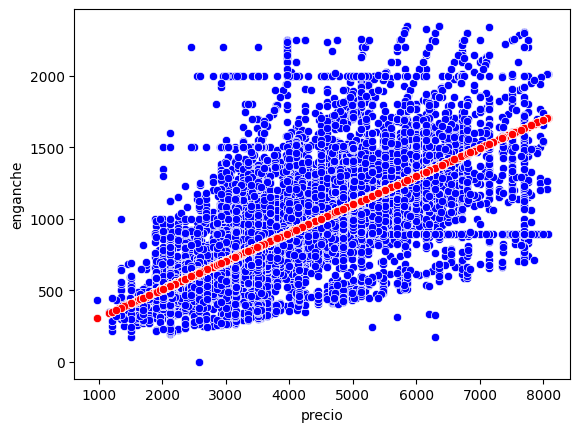

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='enganche', color="blue", data=data_cl)
sns.scatterplot(x='precio', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.4768485990731465

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6905422500275754

**Segunda variable "Precio"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['precio']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.50428665]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 1150.9382599491637}

El modelo matemático sería y=0.50428665 x + 1150.9382599491637

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([2212.9659513 , 2625.97672016, 2265.41176322, ..., 4507.47022274,
       3969.19464926, 5071.26270087])

<Axes: xlabel='costo_total', ylabel='precio'>

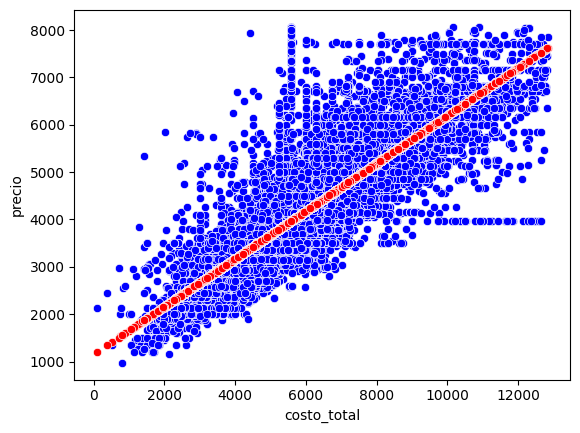

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='precio', color="blue", data=data_cl)
sns.scatterplot(x='costo_total', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.7024382841015145

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.838115913284979

**Tercera variable "Costo total"**


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['monto_financiado']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41759367]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 710.017127831627}

El modelo matemático sería y = 0.41759367 x + 710.017127831627

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

<Axes: xlabel='costo_total', ylabel='monto_financiado'>

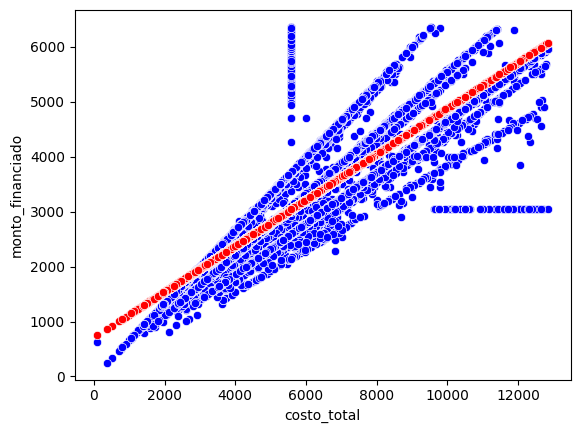

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='monto_financiado', color="blue", data=data_cl)
sns.scatterplot(x='costo_total', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.775357011654102

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8805435887303377

**Cuarta variable "Pagos_realizados"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['costo_total']]
Var_Dep= data_cl['pagos_realizados']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.000519]),
 'rank_': 1,
 'singular_': array([324566.0128729]),
 'intercept_': 7.016405753636058}

El modelo matemático sería y = 0.000519x + 7.016405753636058

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['costo_total']])
y_pred

array([ 8.1094179 ,  8.53447817,  8.1633938 , ..., 10.47086388,
        9.91688422, 11.0511049 ])

<Axes: xlabel='costo_total', ylabel='pagos_realizados'>

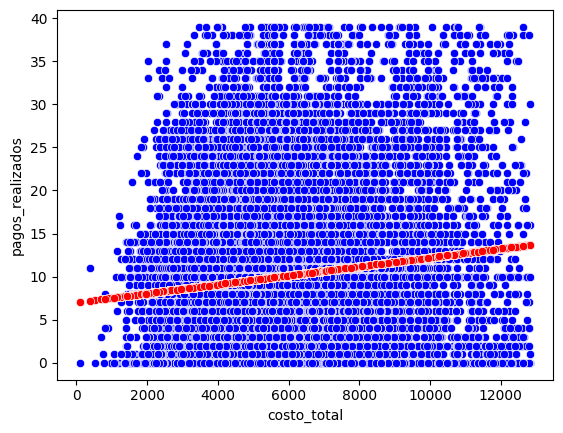

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='pagos_realizados', color="blue", data=data_cl)
sns.scatterplot(x='costo_total', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.014578747219465393

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12074248307644411

**Quinta variable "Riesgo"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['pagos_realizados']]
Var_Dep= data_cl['riesgo']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.24552149]),
 'rank_': 1,
 'singular_': array([1395.11355121]),
 'intercept_': 5.929737037980256}

El modelo matemático sería y = -0.24552149 x + 5.929737037980256

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['pagos_realizados']])
y_pred

array([5.92973704, 5.92973704, 5.92973704, ..., 5.92973704, 5.92973704,
       5.92973704])

<Axes: xlabel='costo_total', ylabel='pagos_realizados'>

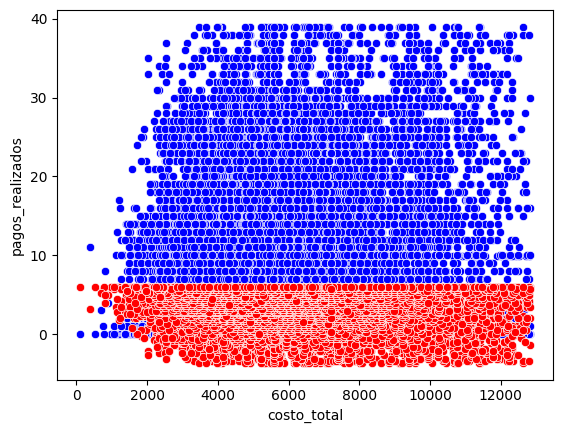

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='costo_total', y='pagos_realizados', color="blue", data=data_cl)
sns.scatterplot(x='costo_total', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.028311410721898245

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1682599498451674

**Sexta variable "plazo"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['precio']]
Var_Dep= data_cl['plazo']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00168374]),
 'rank_': 1,
 'singular_': array([195288.39118269]),
 'intercept_': 19.226551518514775}

El modelo matemático sería y = 0.00168374 x + 19.2265

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['precio']])
y_pred

array([22.508158  , 24.2760835 , 22.52499538, ..., 27.39099985,
       25.90964666, 28.31705607])

<Axes: xlabel='precio', ylabel='plazo'>

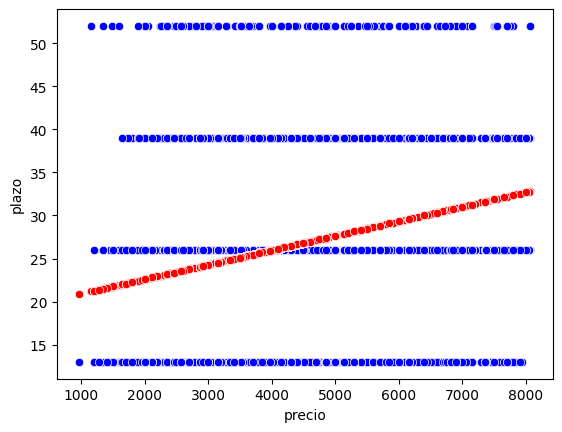

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='plazo', color="blue", data=data_cl)
sns.scatterplot(x='precio', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.04766875059053288

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21833174434912775

**Séptima variable "Monto financiado"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['precio']]
Var_Dep= data_cl['monto_financiado']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.73746531]),
 'rank_': 1,
 'singular_': array([195288.39118269]),
 'intercept_': 116.63867328924061}

El modelo matemático sería y = 0.41759367 x + 710.017127831627

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['precio']])
y_pred

array([1553.95855927, 2328.29713304, 1561.33321236, ..., 3692.6079535 ,
       3043.78597521, 4098.2138731 ])

<Axes: xlabel='precio', ylabel='monto_financiado'>

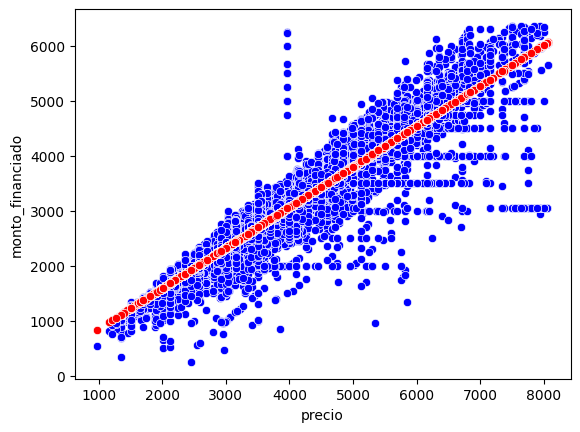

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='monto_financiado', color="blue", data=data_cl)
sns.scatterplot(x='precio', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.4768485990731465

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6905422500275754

**Octava variable "Porcentaje enganche"**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data_cl[['plazo']]
Var_Dep= data_cl['porc_enganche']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['plazo'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.03900481]),
 'rank_': 1,
 'singular_': array([1506.03201519]),
 'intercept_': 1.1801814544441627}

El modelo matemático y = -0.03900481 x + 1.1801814544441627

In [ ]:
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=data_cl[['plazo']])
y_pred

array([ 0.16605627,  0.67311886,  0.67311886, ...,  0.16605627,
       -0.34100632,  0.16605627])

<Axes: xlabel='plazo', ylabel='porc_enganche'>

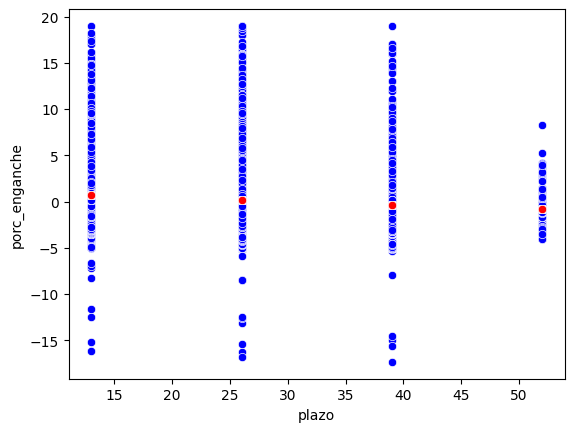

In [65]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='plazo', y='porc_enganche', color="blue", data=data_cl)
sns.scatterplot(x='plazo', y= y_pred, color="red", data=data_cl)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter
#Con est obtenemos r cuadrado

0.014455065977636905

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12022922264423448